In [1]:
# Name - Suraj Chouhan
#Enroll - 0818CS191181

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [4]:
data = pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
# Changing column names for betterment
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(data)

Feature: maint with ['vhigh' 'high' 'med' 'low'] Levels
Feature: doors with ['2' '3' '4' '5more'] Levels
Feature: persons with ['2' '4' 'more'] Levels
Feature: lug_boot with ['small' 'med' 'big'] Levels
Feature: safety with ['med' 'high' 'low'] Levels
Feature: class with ['unacc' 'acc' 'vgood' 'good'] Levels


In [8]:
data.isnull().sum() 

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [10]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


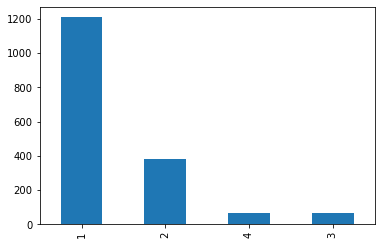

In [16]:
#Plotting the Class variable
data['class'].value_counts().plot(kind = 'bar')
plt.show()

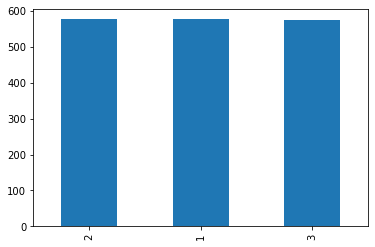

In [14]:
#Distribution of Independent Variables
#We can check the distribution of the independent variable to better understand the data.
#I include one example here, however, you should try with other variables.
data['safety'].value_counts().plot(kind = 'bar')
plt.show()

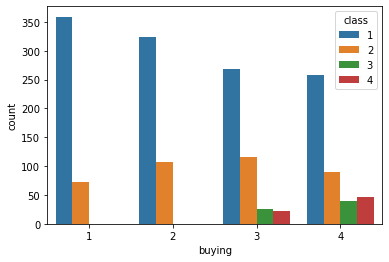

In [15]:
import seaborn as sns
sns.countplot(data['buying'], hue = data['class'])
plt.show()

In [11]:
#Splitting Data into Train Test
x = data.drop(['class'], axis = 1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1208, 6)
X_test: (519, 6)
Y_train: (1208,)
Y_test: (519,)


In [12]:
#Creating Evaluation Parametric Function
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

In [13]:
# logistic Regrassion
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(x_train,y_train)

yp_train = lr.predict(x_train)
yp_test = lr.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.82      0.91      0.86       848
           2       0.58      0.44      0.50       266
           3       0.27      0.10      0.14        42
           4       0.52      0.44      0.48        52

    accuracy                           0.76      1208
   macro avg       0.55      0.47      0.50      1208
weighted avg       0.73      0.76      0.74      1208

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.82      0.94      0.87       361
           2       0.60      0.42      0.49       118
           3       0.67      0.26      0.38        23
           4       0.44      0.41      0.42        17

    accuracy                           0.77       519
   macro avg       0.63      0.51      0.54       519
weighted avg       0.75      0.77    